In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

import xtrack as xt
import xpart as xp
import xobjects as xo
import xcoll as xc

# Tw4d for different delta0

In [6]:
line = xt.Line.from_json('../../injection_lines/sps_q20_inj.json')
tt = line.get_table()
tw = line.twiss()

Loading line from dict:   0%|          | 0/4037 [00:00<?, ?it/s]

Done loading line from dict.           


In [3]:
bpms_hor = ['bph.10208', 'bph.10408', 'bph.10608', 'bph.10808', 
            'bph.11008', 'bph.11208', 'bph.11408', 'bph.11608', 'bph.11831', 
            'bph.12008', 'bph.12208', 'bph.12408', 'bph.12608', 'bph.12808', 
            'bph.13008', 'bph.13208', 'bph.13408', 'bph.13608', 
            'bph.20208', 'bph.20408', 'bph.20608', 'bph.20808', 
            'bph.21008', 'bph.21208', 'bph.21408', 
            'bph.22008', 'bph.22208', 'bph.22408', 'bph.22608', 'bph.22808', 
            'bph.23008', 'bph.23208', 'bph.23408', 'bph.23608', 
            'bph.30208', 'bph.30408', 'bph.30608', 'bph.30808', 
            'bph.31008', 'bph.31208', 'bph.31408', 'bph.31608', 'bph.31808', 
            'bph.32008', 'bph.32208', 'bph.32408', 'bph.32608', 'bph.32808', 
            'bph.33008', 'bph.33208', 'bph.33408', 'bph.33608', 
            'bph.40208', 'bph.40408', 'bph.40608', 'bph.40808', 
            'bph.41008', 'bph.41208', 'bph.41408', 'bph.41607', #Mistake in bpm name (lsa name is bph.41608, not 7)
            'bph.42008', 'bph.42208', 'bph.42408', 'bph.42608', 'bph.42808', 
            'bph.43008', 'bph.43208', 'bph.43408', 'bph.43608', 
            'bph.50208', 'bph.50408', 'bph.50608', 'bph.50808', 
            'bph.51008', 'bph.51208', 'bph.51408', 
            'bph.52008', 'bph.52208', 'bph.52408', 'bph.52608', 'bph.52808', 
            'bph.53008', 'bph.53208', 'bph.53408', 'bph.53608', 
            'bph.60208', 'bph.60408', 'bph.60608', 'bph.60808', 
            'bph.61008', 'bph.61208', 'bph.61408', 'bph.61608', 
            'bph.62008', 'bph.62208', 'bph.62408', 'bph.62608', 'bph.62808', 
            'bph.63008', 'bph.63208', 'bph.63408', 'bph.63608']

In [7]:
delta_sampling = np.linspace(0, 0.01, 1000)

In [8]:
tw = line.twiss()
print(tw.qx, tw.qy)
print(tw.dqx, tw.dqy)

20.130095529125725 20.18009638231107
11.224914945659666 10.295691082289986


In [9]:
twisses_4d_pos = []
twisses_4d_neg = []

for i in range(len(delta_sampling)):
    if i % 100 == 0:
        print(f'Calculating twiss for delta {i}/{len(delta_sampling)}')
    twisses_4d_pos.append(line.twiss(delta0=delta_sampling[i], method='4d'))
    twisses_4d_neg.append(line.twiss(delta0=-delta_sampling[i], method='4d'))

Calculating twiss for delta 0/1000
Calculating twiss for delta 100/1000
Calculating twiss for delta 200/1000
Calculating twiss for delta 300/1000
Calculating twiss for delta 400/1000
Calculating twiss for delta 500/1000
Calculating twiss for delta 600/1000
Calculating twiss for delta 700/1000
Calculating twiss for delta 800/1000
Calculating twiss for delta 900/1000


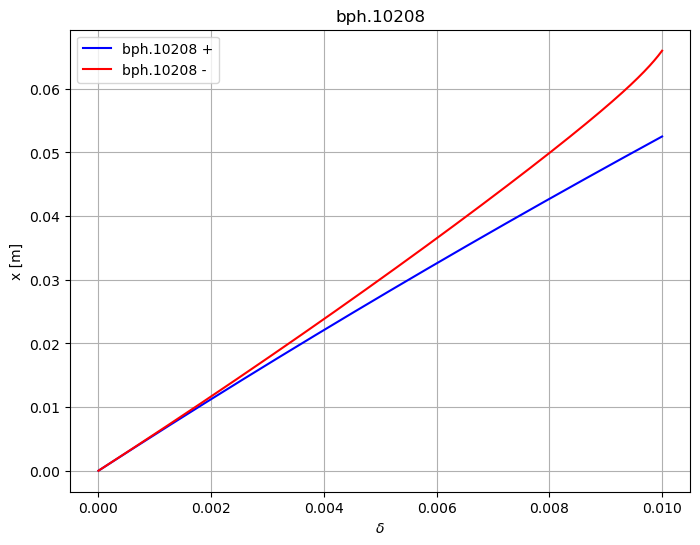

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
colormap = colormaps['viridis']
norm = plt.Normalize(vmin=0, vmax= len(delta_sampling))

bpm = bpms_hor[0]
x4d_pos = np.array([twisses_4d_pos[i].rows[bpm].x[0] for i in range(len(delta_sampling))])
x4d_neg = np.array([twisses_4d_neg[i].rows[bpm].x[0] for i in range(len(delta_sampling))])

ax.plot(delta_sampling, x4d_pos, label=f'{bpm} +', color='blue')
ax.plot(delta_sampling, -x4d_neg, label=f'{bpm} -', color='red')
ax.set_xlabel('$\\delta$')
ax.set_ylabel('x [m]')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()

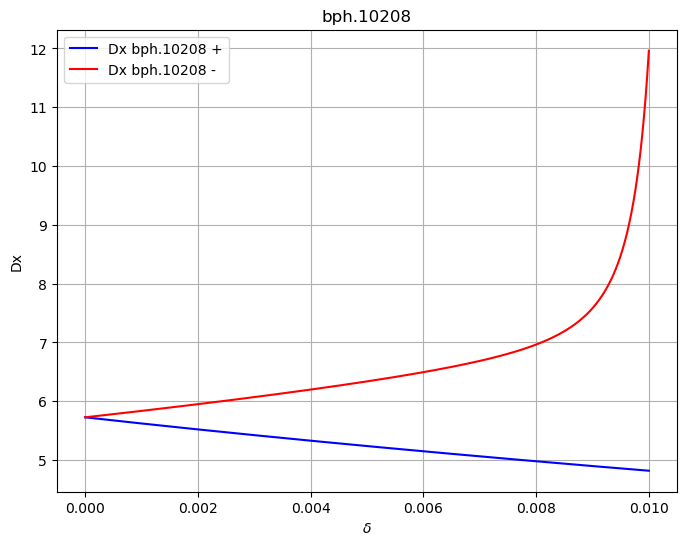

In [ ]:
#Dx ook speigelen
fig, ax = plt.subplots(1,1, figsize=(8,6))

bpm = bpms_hor[0]
Dx4d_pos = np.array([twisses_4d_pos[i].rows[bpm].dx[0] for i in range(len(delta_sampling))])
Dx4d_neg = np.array([twisses_4d_neg[i].rows[bpm].dx[0] for i in range(len(delta_sampling))])
DDx4d_pos = np.array([twisses_4d_pos[i].rows[bpm].ddx[0] for i in range(len(delta_sampling))])
DDx4d_neg = np.array([twisses_4d_neg[i].rows[bpm].ddx[0] for i in range(len(delta_sampling))])

ax.plot(delta_sampling, Dx4d_pos, label=f'Dx {bpm} +', color='blue')
ax.plot(delta_sampling, Dx4d_neg, label=f'Dx {bpm} -', color='red')
# ax.plot(delta_sampling, DDx4d_pos, label=f'DDx2 {bpm} +', color='cyan')
# ax.plot(delta_sampling, -DDx4d_neg, label=f'DDx2 {bpm} -', color='magenta')

ax.set_xlabel('$\\delta$')
ax.set_ylabel('Dx')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()

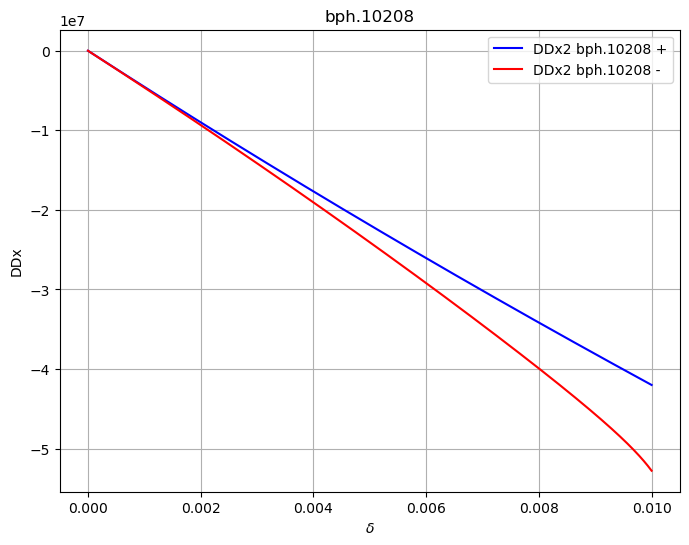

In [54]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

bpm = bpms_hor[0]
Dx4d_pos = np.array([twisses_4d_pos[i].rows[bpm].dx[0] for i in range(len(delta_sampling))])
Dx4d_neg = np.array([twisses_4d_neg[i].rows[bpm].dx[0] for i in range(len(delta_sampling))])
DDx4d_pos = np.array([twisses_4d_pos[i].rows[bpm].ddx[0] for i in range(len(delta_sampling))])
DDx4d_neg = np.array([twisses_4d_neg[i].rows[bpm].ddx[0] for i in range(len(delta_sampling))])

# ax.plot(delta_sampling, Dx4d_pos, label=f'Dx {bpm} +', color='blue')
# ax.plot(delta_sampling, Dx4d_neg, label=f'Dx {bpm} -', color='red')
ax.plot(delta_sampling, DDx4d_pos, label=f'DDx2 {bpm} +', color='blue')
ax.plot(delta_sampling, -DDx4d_neg, label=f'DDx2 {bpm} -', color='red')

ax.set_xlabel('$\\delta$')
ax.set_ylabel('DDx')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()

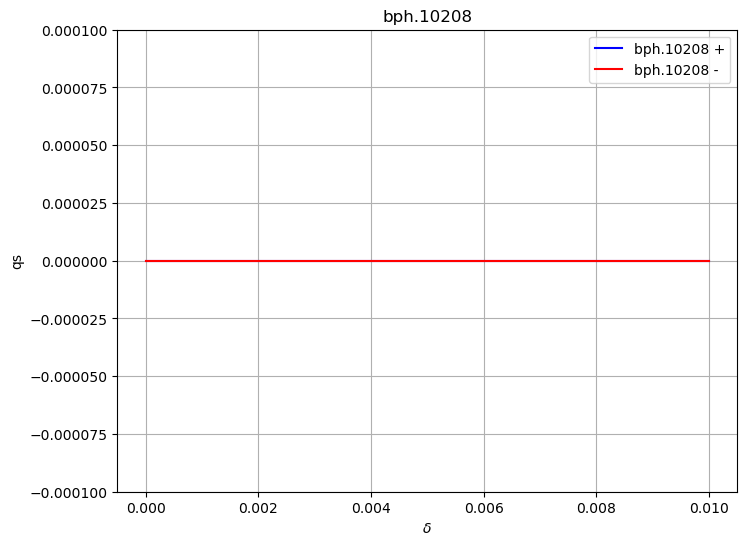

In [94]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
colormap = colormaps['viridis']
norm = plt.Normalize(vmin=0, vmax= len(delta_sampling))

bpm = bpms_hor[0]
x4d_pos = np.array([twisses_4d_pos[i].rows[bpm].qs for i in range(len(delta_sampling))])
x4d_neg = np.array([twisses_4d_neg[i].rows[bpm].qs for i in range(len(delta_sampling))])

ax.plot(delta_sampling, x4d_pos, label=f'{bpm} +', color='blue')
ax.plot(delta_sampling, -x4d_neg, label=f'{bpm} -', color='red')
ax.set_xlabel('$\\delta$')
ax.set_ylabel('qs')
ax.set_ylim(-0.0001, 0.0001)
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()

In [97]:
np.unique(x4d_pos)

array([0])

# Tw4d for different delta0 with change in cavity frequency

In [76]:
line = xt.Line.from_json('../../injection_lines/sps_q20_inj.json')
cavity_elements, cavity_names = line.get_elements_of_type(xt.Cavity)
for cav in cavity_elements[1:]:
    cav.voltage = 0.0
cavity_elements[0].voltage = 3e6  # 3 MV
tt = line.get_table()
tw = line.twiss()

Loading line from dict:   0%|          | 0/4037 [00:00<?, ?it/s]

Done loading line from dict.           


In [82]:
line[cavity_names[0]]

View of Cavity(length=4.11, voltage=3e+06, frequency=2e+08, lag=180, lag_taper=0, absolute_time=np.int64(0), num_kicks=np.int64(0), model='adaptive', integrator='adaptive', shift_x=0, shift_y=0, shift_s=0, rot_s_rad=0, rot_x_rad=0, rot_y_rad=0, rot_s_rad_no_frame=0, rot_shift_anchor=0)

In [77]:
bpms_hor = ['bph.10208', 'bph.10408', 'bph.10608', 'bph.10808', 
            'bph.11008', 'bph.11208', 'bph.11408', 'bph.11608', 'bph.11831', 
            'bph.12008', 'bph.12208', 'bph.12408', 'bph.12608', 'bph.12808', 
            'bph.13008', 'bph.13208', 'bph.13408', 'bph.13608', 
            'bph.20208', 'bph.20408', 'bph.20608', 'bph.20808', 
            'bph.21008', 'bph.21208', 'bph.21408', 
            'bph.22008', 'bph.22208', 'bph.22408', 'bph.22608', 'bph.22808', 
            'bph.23008', 'bph.23208', 'bph.23408', 'bph.23608', 
            'bph.30208', 'bph.30408', 'bph.30608', 'bph.30808', 
            'bph.31008', 'bph.31208', 'bph.31408', 'bph.31608', 'bph.31808', 
            'bph.32008', 'bph.32208', 'bph.32408', 'bph.32608', 'bph.32808', 
            'bph.33008', 'bph.33208', 'bph.33408', 'bph.33608', 
            'bph.40208', 'bph.40408', 'bph.40608', 'bph.40808', 
            'bph.41008', 'bph.41208', 'bph.41408', 'bph.41607', #Mistake in bpm name (lsa name is bph.41608, not 7)
            'bph.42008', 'bph.42208', 'bph.42408', 'bph.42608', 'bph.42808', 
            'bph.43008', 'bph.43208', 'bph.43408', 'bph.43608', 
            'bph.50208', 'bph.50408', 'bph.50608', 'bph.50808', 
            'bph.51008', 'bph.51208', 'bph.51408', 
            'bph.52008', 'bph.52208', 'bph.52408', 'bph.52608', 'bph.52808', 
            'bph.53008', 'bph.53208', 'bph.53408', 'bph.53608', 
            'bph.60208', 'bph.60408', 'bph.60608', 'bph.60808', 
            'bph.61008', 'bph.61208', 'bph.61408', 'bph.61608', 
            'bph.62008', 'bph.62208', 'bph.62408', 'bph.62608', 'bph.62808', 
            'bph.63008', 'bph.63208', 'bph.63408', 'bph.63608']

In [79]:
def df_to_delta(df):
    sps_gtr = 17.95
    sps_g0 = 27.643
    f0 = 200e6
    eta = 1/sps_gtr**2 - 1/sps_g0**2
    return -df/(f0*eta)

def delta_to_df(delta):
    sps_gtr = 17.95
    sps_g0 = 27.643
    f0 = 200e6
    eta = 1/sps_gtr**2 - 1/sps_g0**2
    return -delta*f0*eta

In [80]:
delta_sampling = np.linspace(0, 0.01, 1000)
df_sampling = delta_to_df(delta_sampling)

In [83]:
twisses_4d_pos = []
twisses_4d_neg = []

delta_sampling = np.linspace(0, 0.01, 1000)
df_sampling = delta_to_df(delta_sampling)

for i in range(len(delta_sampling)):
    if i % 100 == 0:
        print(f'Calculating twiss for delta {i}/{len(delta_sampling)}')
    line[cavity_names[0]].frequency = 200e6 + df_sampling[i]
    twisses_4d_pos.append(line.twiss(delta0=delta_sampling[i], method='4d'))
    twisses_4d_neg.append(line.twiss(delta0=-delta_sampling[i], method='4d'))

Calculating twiss for delta 0/1000
Calculating twiss for delta 100/1000
Calculating twiss for delta 200/1000
Calculating twiss for delta 300/1000
Calculating twiss for delta 400/1000
Calculating twiss for delta 500/1000
Calculating twiss for delta 600/1000
Calculating twiss for delta 700/1000
Calculating twiss for delta 800/1000
Calculating twiss for delta 900/1000


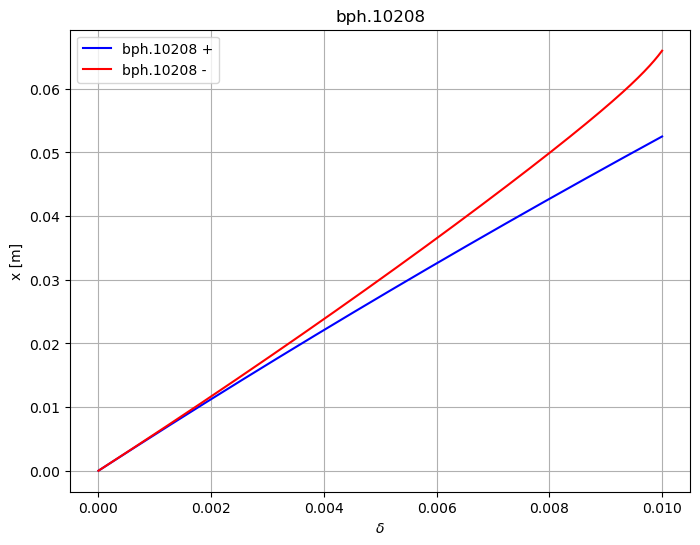

In [84]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
colormap = colormaps['viridis']
norm = plt.Normalize(vmin=0, vmax= len(delta_sampling))

bpm = bpms_hor[0]
x4d_pos = np.array([twisses_4d_pos[i].rows[bpm].x[0] for i in range(len(delta_sampling))])
x4d_neg = np.array([twisses_4d_neg[i].rows[bpm].x[0] for i in range(len(delta_sampling))])

ax.plot(delta_sampling, x4d_pos, label=f'{bpm} +', color='blue')
ax.plot(delta_sampling, -x4d_neg, label=f'{bpm} -', color='red')
ax.set_xlabel('$\\delta$')
ax.set_ylabel('x [m]')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()

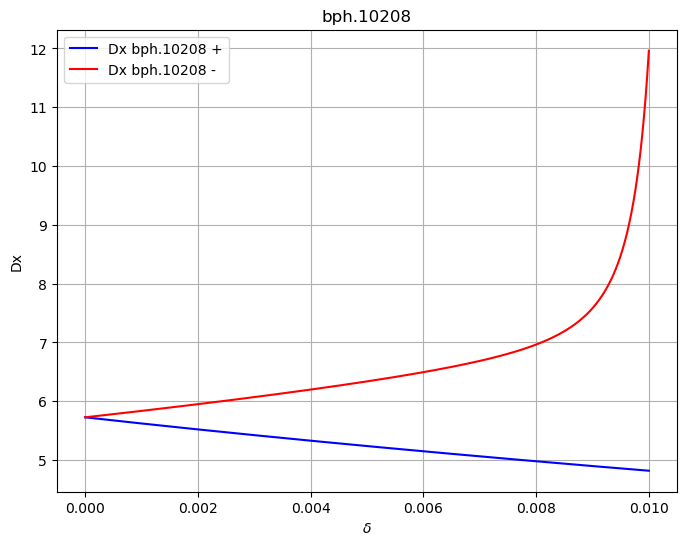

In [85]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

bpm = bpms_hor[0]
Dx4d_pos = np.array([twisses_4d_pos[i].rows[bpm].dx[0] for i in range(len(delta_sampling))])
Dx4d_neg = np.array([twisses_4d_neg[i].rows[bpm].dx[0] for i in range(len(delta_sampling))])
DDx4d_pos = np.array([twisses_4d_pos[i].rows[bpm].ddx[0] for i in range(len(delta_sampling))])
DDx4d_neg = np.array([twisses_4d_neg[i].rows[bpm].ddx[0] for i in range(len(delta_sampling))])

ax.plot(delta_sampling, Dx4d_pos, label=f'Dx {bpm} +', color='blue')
ax.plot(delta_sampling, Dx4d_neg, label=f'Dx {bpm} -', color='red')
# ax.plot(delta_sampling, DDx4d_pos, label=f'DDx2 {bpm} +', color='cyan')
# ax.plot(delta_sampling, -DDx4d_neg, label=f'DDx2 {bpm} -', color='magenta')

ax.set_xlabel('$\\delta$')
ax.set_ylabel('Dx')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()

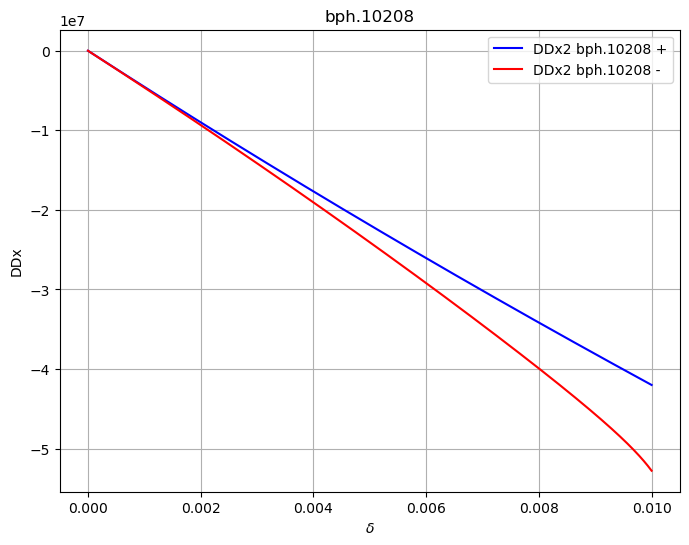

In [86]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

bpm = bpms_hor[0]
Dx4d_pos = np.array([twisses_4d_pos[i].rows[bpm].dx[0] for i in range(len(delta_sampling))])
Dx4d_neg = np.array([twisses_4d_neg[i].rows[bpm].dx[0] for i in range(len(delta_sampling))])
DDx4d_pos = np.array([twisses_4d_pos[i].rows[bpm].ddx[0] for i in range(len(delta_sampling))])
DDx4d_neg = np.array([twisses_4d_neg[i].rows[bpm].ddx[0] for i in range(len(delta_sampling))])

# ax.plot(delta_sampling, Dx4d_pos, label=f'Dx {bpm} +', color='blue')
# ax.plot(delta_sampling, Dx4d_neg, label=f'Dx {bpm} -', color='red')
ax.plot(delta_sampling, DDx4d_pos, label=f'DDx2 {bpm} +', color='blue')
ax.plot(delta_sampling, -DDx4d_neg, label=f'DDx2 {bpm} -', color='red')

ax.set_xlabel('$\\delta$')
ax.set_ylabel('DDx')
ax.set_title(f'{bpm}')
ax.legend()
ax.grid()

Changing cavity frequency doesn't seem to have any effect